In [1]:
import pandas as pd
import anndata
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from tqdm import tqdm
from modules.mlp_model import MLP, SiameseMLP
from modules.autoencoder_model import Autoencoder

In [2]:
n=500

In [3]:
pancreas_data = anndata.read_h5ad("data/A-sn-RNAseq-2-weeks-EX-Female-EXPECTED-Count-30000-Exclude-intronic-reads-False.h5ad")
if pancreas_data.n_obs > n:
    sampled_indices = np.random.choice(pancreas_data.n_obs, n, replace=False)
    sampled_data = pancreas_data[sampled_indices]
else:
    sampled_data = pancreas_data

del pancreas_data
df1 = sampled_data.to_df()

In [4]:
lung_data = anndata.read_h5ad("data/B-sn-RNAseq-2-weeks-EX-Female-EXPECTED-Count-30000-Exclude-intronic-reads-False.h5ad")
if lung_data.n_obs > n:
    sampled_indices = np.random.choice(lung_data.n_obs, n, replace=False)
    sampled_data = lung_data[sampled_indices]
else:
    sampled_data = lung_data

del lung_data
df2 = sampled_data.to_df()

In [5]:
common_columns = df1.columns.intersection(df2.columns)

df1 = df1[common_columns]
df2 = df2[common_columns]

In [6]:
df_merge = pd.concat([df1, df2])

/home/xavier/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


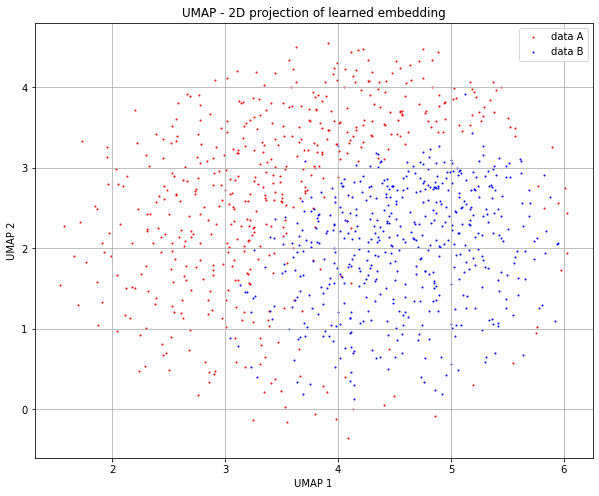

In [9]:
scaler = StandardScaler()
scaled_outputs = scaler.fit_transform(df_merge.values)
reducer = UMAP(n_neighbors=100, n_components=2, random_state=42)
embedding = reducer.fit_transform(scaled_outputs)
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:500, 0], embedding[:500, 1], color='red', s=1, label='data A')
plt.scatter(embedding[500:, 0], embedding[500:, 1], color='blue', s=1, label='data B')
plt.title('UMAP - 2D projection of learned embedding')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.grid(True)
#plt.savefig('umap_embedding_mlp.png')
plt.show()